<a href="https://colab.research.google.com/github/annesantos1990/diversity_analysis/blob/main/Regressao_Linear_Eslaine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelo de Regressão Linear**

Eslaine Santos

silhouette-profile-face-group-men-women-diverse-culture-people-diversity-racial-equality_175061-345.avif

A proposta desse projeto é fazer um modelo que consiga predizer o salário das pessoas no setor de TI, trazendo insights de quais fatores influenciam mais ou menos nno salário dos profissionais da área.

Nesse modelo, o enfoque será em predizer o salário de pessoas que trabalham com CLT. Isso porque existe muitas características diferentes do trabalho PJ e Freelancer que poderia atrapalhar o modelo.

## Importando os dados

In [ ]:
import pandas as pd

In [ ]:
# lendo o aquivo do drive
dados = pd.read_excel('/content/drive/MyDrive/PrograMaria - Análise de Dados/Módulo 7/analise_dados_mod7_(1).xlsx')

In [ ]:
dados.head()

,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,...,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,Distrito Federal (DF),...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,0.0,0.0
1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,Pará (PA),...,Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,1.0,0.0
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,Distrito Federal (DF),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,1,0.0,1.0
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,Minas Gerais (MG),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de ...,0,0.0,1.0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,Pará (PA),...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,0.0,1.0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 46 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         4271 non-null   object 
 1   IDADE                                                                                                                      4271 non-null   float64
 2   FAIXA IDADE                                                                                                                4271 non-null   object 
 3   GENERO                                                                                                                     4271 

## Feature Engineering

### Variável - Situação de Trabalho

Será selecionada nessa coluna, somente as pessoas que trabalham CLT como foi mencionado na introdução.

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
dados1 = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'] == 'Empregado (CLT)']

In [ ]:
dados1['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


### Variável - Cor/Raça/Etnia

In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,2744
Parda,1054
Preta,291
Amarela,128
Prefiro não informar,26
Outra,17
Indígena,11


Os seguintes valores possuem ou uma quantidade pequena de amostra ou não são dados relevantes:

* Indígena;
* Outra;
* Prefiro não informar

Por isso, serão eliminados da nossa análise.


In [ ]:
# lista de valores que serão eliminados
lista_retirar = ['Indígena', 'Prefiro não informar', 'Outra']

In [ ]:
dados = dados1[~dados1['COR/RACA/ETNIA'].isin(lista_retirar)]

#isin selecionaria tudo que está na lista lista_retirar, mas colocamos "~" que nega tudo que está depois dele.

In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85


Nessa parte, os valores categóricos serão transformados em númericos para serem utilizados no modelo.

In [ ]:
dados['NÃO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)

#se for não branca, terá valor 1, caso contrário zero

<ipython-input-174-6d2000917fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NÃO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0)


### Variável - Anos de Experiência

In [ ]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


Como os dados são categóricos, vamos transformar em númericos:

In [ ]:
dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract('(\d+)')

<ipython-input-176-d634df2928bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TEMPO_EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract('(\d+)')


In [ ]:
dados['TEMPO_EXPERIENCIA'].value_counts()

,count
TEMPO_EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


### Variável - Nº de Funcionários

In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


Assim como a variável Tempo de Experiência, a variavel nº de funcionários precisa ser transformada em uma variavel númerica para ser utilizada no modelo.

Porém, é necessário susbstituir os "." dos números por "":

In [ ]:
# substituindo os pontos dos números por nada
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')

<ipython-input-179-1abf421f21bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.', '')


In [ ]:
dados['NUMERO DE FUNCIONARIOS_2'] = dados['NUMERO DE FUNCIONARIOS'].str.extract('(\d+)')

<ipython-input-180-0a3f544ee080>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NUMERO DE FUNCIONARIOS_2'] = dados['NUMERO DE FUNCIONARIOS'].str.extract('(\d+)')


In [ ]:
dados['NUMERO DE FUNCIONARIOS_2'].value_counts()

,count
NUMERO DE FUNCIONARIOS_2,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


### Verificando nulos

In [ ]:
# coluna numero de funcionarios_2
dados['NUMERO DE FUNCIONARIOS_2'].isnull().sum()

0

In [ ]:
#coluna Tempo de Experiencia
dados['TEMPO_EXPERIENCIA'].isnull().sum()

127

In [ ]:
# retirando os valores nulos da coluna Tempo_experiencia
dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)

<ipython-input-184-2d1314fbf7db>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TEMPO_EXPERIENCIA'] = dados['TEMPO_EXPERIENCIA'].fillna(0)


### Variável Insatisfação

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2732 entries, 1 to 4270
Data columns (total 49 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         2732 non-null   object 
 1   IDADE                                                                                                                      2732 non-null   float64
 2   FAIXA IDADE                                                                                                                2732 non-null   object 
 3   GENERO                                                                                                                     2732 non-n

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


Vamos colocar o valor 1 para toda a frase que contiver a palavra 'Salário' no meio da frase

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].isnull().sum()

2071

In [ ]:
# forma 1
dados['INSATISFACAO_SALARIO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

# Essa forma, excluiria os valores nulos da coluna

<ipython-input-188-023c81c5816f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['INSATISFACAO_SALARIO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)


In [ ]:
dados['INSATISFACAO_SALARIO'] = 0

<ipython-input-189-73e327aaa042>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['INSATISFACAO_SALARIO'] = 0


In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'INSATISFACAO_SALARIO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(), 'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0)

In [ ]:
dados['INSATISFACAO_SALARIO'].value_counts()


,count
INSATISFACAO_SALARIO,
0,2453
1,279


### Variável - Nível de ensino

Dando pontuações para as variáveis de ensino de 0 (Não tenho graduação formal) a 5 (doutorado ou PHD)

In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


In [ ]:
dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x == 'Não tenho graduação formal' else
                             1 if x == 'Estudante de Graduação' else
                             2 if x == 'Graduação/Bacharelado' else
                             3 if x == 'Mestrado' else
                             4 if x == 'Doutorado ou Phd' else -1)

<ipython-input-193-e815741c98c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NIVEL DE ENSINO'] = dados['NIVEL DE ENSINO'].apply(lambda x: 0 if x == 'Não tenho graduação formal' else


In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
2,1024
-1,979
3,306
1,271
4,100
0,52


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2732 entries, 1 to 4270
Data columns (total 50 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   ID                                                                                                                         2732 non-null   object 
 1   IDADE                                                                                                                      2732 non-null   float64
 2   FAIXA IDADE                                                                                                                2732 non-null   object 
 3   GENERO                                                                                                                     2732 non-n

## Separando as variáveis do modelo

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
dados = dados[['IDADE', 'GENERO', 'NOVO_NIVEL', 'SALARIO', 'NÃO BRANCA', 'TEMPO_EXPERIENCIA', 'NUMERO DE FUNCIONARIOS_2', 'INSATISFACAO_SALARIO', 'NIVEL DE ENSINO', 'REGIAO ONDE MORA', 'SETOR']]

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2732 entries, 1 to 4270
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   IDADE                     2732 non-null   float64
 1   GENERO                    2732 non-null   object 
 2   NOVO_NIVEL                2732 non-null   object 
 3   SALARIO                   2732 non-null   float64
 4   NÃO BRANCA                2732 non-null   int64  
 5   TEMPO_EXPERIENCIA         2732 non-null   object 
 6   NUMERO DE FUNCIONARIOS_2  2732 non-null   object 
 7   INSATISFACAO_SALARIO      2732 non-null   int64  
 8   NIVEL DE ENSINO           2732 non-null   int64  
 9   REGIAO ONDE MORA          2715 non-null   object 
 10  SETOR                     2732 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 256.1+ KB


Para as variável "Gênero", "regiao onde mora", "novo nivel", "setor", pois são variáveis, cujos dados não possuem grau de importancia, vamos transformá-las em variáveis dummies:

In [ ]:
dados = pd.get_dummies(dados, columns=['GENERO', 'NOVO_NIVEL', 'SETOR', 'REGIAO ONDE MORA'], drop_first=True)

## **Conjunto teste e conjunto treinamento**

Aqui dividi meus dados em dois:

- Em um conjunto de treinamento - que é utilizado pelo modelo para aprender;
- Conjunto de teste - utilizado para analisar o desempenho do modelo para os dados que ele ainda não viu.

In [ ]:
# atributos - variáveis preditivas
X = dados.drop('SALARIO', axis=1)
# retiramos o salário, que é a variável que valor prever

# objetivo - salário - variável que vamos prever
y = dados['SALARIO']

Dividindo e dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Para normalizar os dados, iremos importar a biblioteca sklearn.preprocessing.

Criamos a normalização, pois os modelos de regressão funcionam melhor quando os dados tem uma escala uniforme.

Nós criamos o objeto de normalização e aplicamos.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

#normalizando a variável de treino e teste
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelo de Regressão

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# predição do conjunto de teste
y_pred = model.predict(X_test_scaled)

In [ ]:
# avaliando o modelo de regressão
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
# erro quadrático médio
mse = mean_squared_error(y_test, y_pred)
print('Erro quadrático médio:', mse)

Erro quadrático médio: 24270057.066701677


In [ ]:
# erro médio absoluto
mae = mean_absolute_error(y_test, y_pred)
print('Erro médio absoluto:', mae)

Erro médio absoluto: 3396.6371413332663


In [ ]:
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinação (R²):', r2)

Coeficiente de determinação (R²): 0.5048160321000107


**R2 Moderado**: O valor de 0,50 indica um desempenho mediano do modelo. Isso sugere que ele está capturando parte das tendências nos dados.

O gráfico mostrando a linha de tendência poderá esclarecer melhor quais pontos o modelo prever melhoro salário.

## Gráfico do Modelo

Aqui, vamos fazer um gráfico dos valore reais e valores preditos

In [ ]:
import matplotlib.pyplot as plt

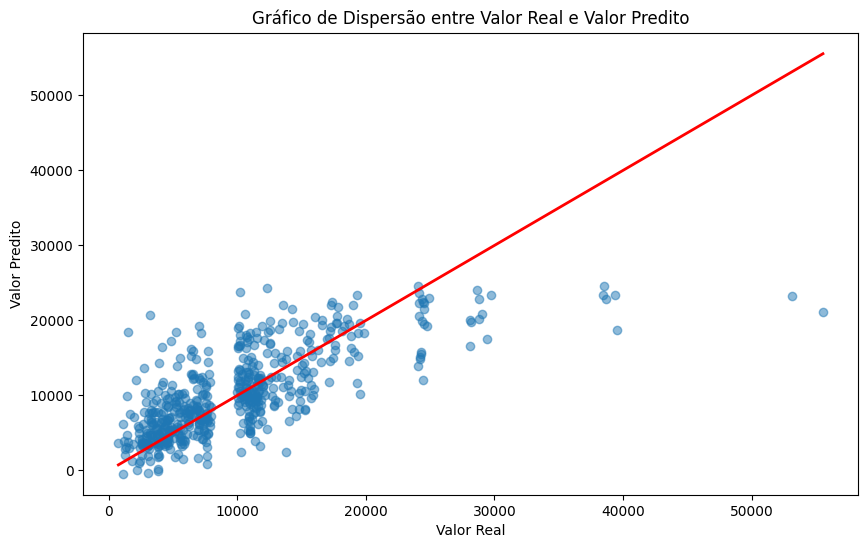

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Gráfico de Dispersão entre Valor Real e Valor Predito')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.show()

É possível analisar através do gráfico acima que o modelo prever bem os salários abaixo de 20.000 reais.

## Coeficientes do modelo

Aqui, vamos determinar quais coeficientes são maiores para entender quais variáveis possuem um peso maior na determinação do salário.

In [1]:
#variável com o nome dos atributos
nomes_atributo = X_train.columns
nomes_atributo

NameError: name 'X_train' is not defined

Criando um data frame com os valores dos coeficientes do modelo:

Forma 1:

In [ ]:
# criando um data frame do pandas com os valores dos coeficientes
df_coef = pd.DataFrame({'Atributo': nomes_atributo, 'Coeficiente': model.coef_})

In [ ]:
df_coef.head()

,Atributo,Coeficiente
0,IDADE,-142.776908
1,NÃO BRANCA,-407.873013
2,TEMPO_EXPERIENCIA,2120.746026
3,NUMERO DE FUNCIONARIOS_2,842.741221
4,INSATISFACAO_SALARIO,-555.896725


Forma 2:

In [ ]:
df_coef_2 = pd.DataFrame(model.coef_, columns=['Coeficiente'], index=nomes_atributo)

In [ ]:
df_coef_2.head()

,Coeficiente
IDADE,-142.776908
NÃO BRANCA,-407.873013
TEMPO_EXPERIENCIA,2120.746026
NUMERO DE FUNCIONARIOS_2,842.741221
INSATISFACAO_SALARIO,-555.896725


Agora vamos ordenar para ver quais coeficientes estão influenciando mais:

In [ ]:
coefs = df_coef.sort_values(by='Coeficiente', ascending=False)

Text(0.5, 1.0, 'Coeficientes do Modelo')

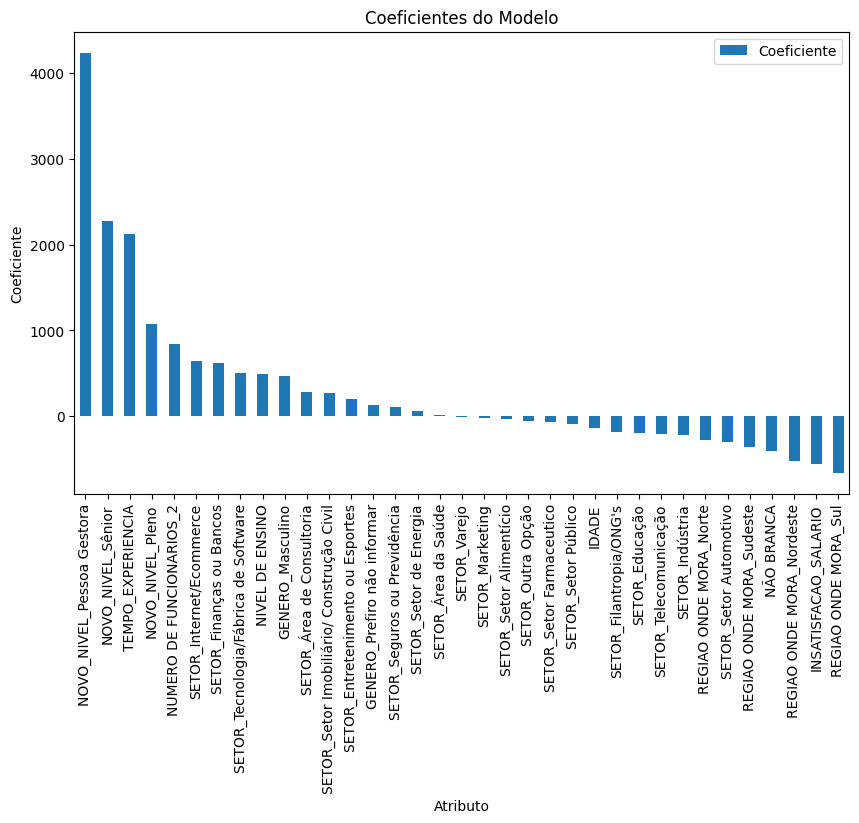

In [ ]:
coefs.plot(kind='bar', x='Atributo', y='Coeficiente', figsize=(10, 6))
plt.xlabel('Atributo')
plt.ylabel('Coeficiente')
plt.title('Coeficientes do Modelo')

Text(0.5, 1.0, 'Coeficientes do Modelo')

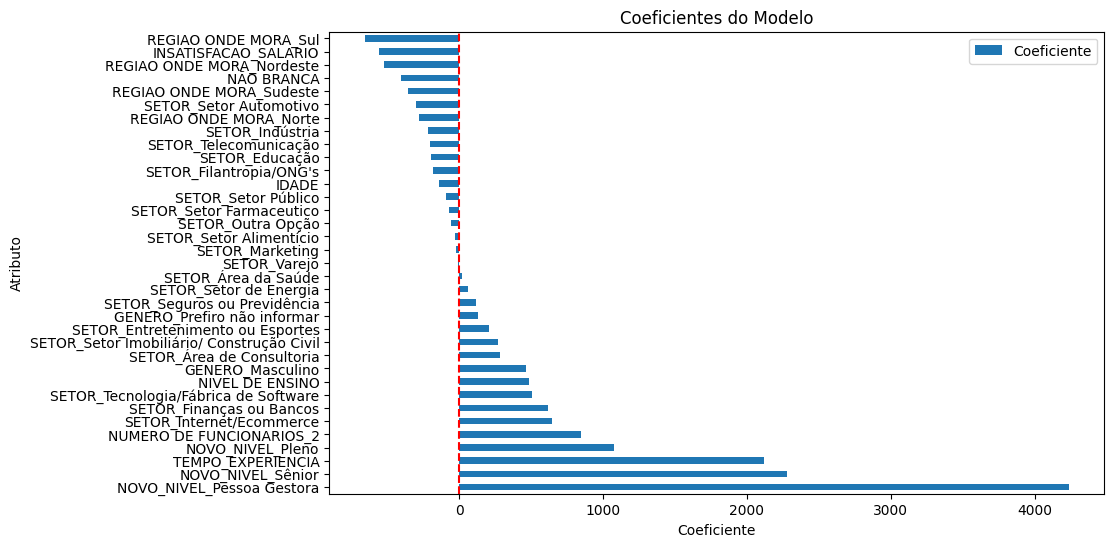

In [ ]:
coefs.plot.barh(x='Atributo', y='Coeficiente', figsize=(10, 6))
# linha de referencia
plt.axvline(x=0, color='red', linestyle='--')
plt.xlabel('Coeficiente')
plt.ylabel('Atributo')
plt.title('Coeficientes do Modelo')

Todas as barras antes do zero tem peso negativo para o valor do salário

E todas as vagas depois do zer tem peso positivo para o valor do salário.

**Variáveis com influência Positiva:**

É possível observar, que o que mais influencia para o salário ser alto é se a pessoa é gestora, seguido por a pessoa ser senior e assim sucessivamente.

**Variáveis com influência Negativa:**

- Pessoas que moram no sul do país teve um maior peso negativo;
- Seguido por insatisfação - Mas nesse caso, possívelmente pelas pessoas terem salários baixos, elas estavam insatisfeitas;
- Pessoas que moram no nordeste;
- Pessoas não brancas - O nosso estudo inicial envolvia o estudo de diversidade e percebemos aqui que o fato da pessoa ser Não Branca tem um peso negativo para seu salário.

